In [ ]:
# this program is aming at evaluating the result with correlation coefficient
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn import preprocessing

In [ ]:
wells = ['19A', 'BT2', 'SR', 'F1B']
#wells = ['BT2','19A', 'SR', 'F1B']
#wells = ['SR', '19A', 'BT2', 'F1B']
#wells = ['F1B','19A', 'BT2', 'SR']

well_path = './'
data_all = []
for well in wells:
    data_tmp = np.load(well_path + well + '.npy')
    data_all.append(data_tmp)
idx1 = 0  # use 19A as the blind test
idx2 = 1
N1 = len(data_all[idx1])
N2 = len(data_all[idx2])
print(N1, N2)
blind_ori = data_all[idx1]

data_merge =np.concatenate((data_all[0], data_all[1], data_all[2], data_all[3]), axis=0)  # Merge all well data together
print('The merged data shape is:', data_merge.shape)

#9 columns and we use 1:7 features ----> VP
features = data_merge[N1:, 1:7]
label_norm = data_merge[N1:, 7]
print(features.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label_norm, test_size=0.15, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_blind = data_merge[0:N1, 1:7]
y_blind = data_merge[0:N1, 7]
X_train_well = data_merge[N1:N1+N2, 1:7]
y_train_well = data_merge[N1:N1+N2, 7]

1930 4057
The merged data shape is: (9894, 10)
(7964, 6)
(6769, 6) (1195, 6) (6769,) (1195,)


In [ ]:
estimator = RandomForestRegressor(max_depth=6, min_samples_split=5, bootstrap=True, min_samples_leaf=1,
                                  max_features='sqrt', n_estimators=2000)

estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
y_blind_pred = estimator.predict(X_blind)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_pred, y_test)

0.91386219425769

In [ ]:
#Compute R-Square value for blind set
from sklearn.metrics import r2_score
BlindR2Value = r2_score(y_blind,y_blind_pred)
print("Training Set R-Square=", BlindR2Value)

Training Set R-Square= 0.8552553234628367


In [ ]:
blind_real = y_blind
blind_pred = y_blind_pred

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_blind, y_blind_pred)

0.8552553234628367

3498.9326 4085.844


(1.5, 6)

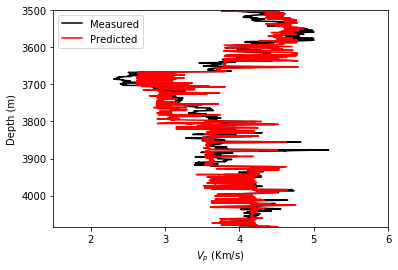

In [ ]:
ztop = np.min(data_merge[0:N1, 0]) - 2.0
zbot = np.max(data_merge[0:N1, 0])
print(ztop, zbot)
f, bx = plt.subplots(nrows=1, ncols=1)
bx.plot(blind_real, data_merge[0:N1, 0], '-', label='Measured', color='black')
bx.plot(blind_pred, data_merge[0:N1, 0], '-', label='Predicted', color='r')
bx.legend()
bx.set_ylim(ztop, zbot)
bx.invert_yaxis()
#bx.grid()
bx.locator_params(axis='x', nbins=5)
bx.set_xlabel("$V_p$ (Km/s)")
bx.set_ylabel("Depth (m)")
#bx.set_xlim(1.5, 3.5)
bx.set_xlim(1.5, 6)